In [15]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("data/modified_0420.csv")
x_train = df.drop(columns=['loan_status', 'Unnamed: 0'])
y_train = df['loan_status']

In [3]:
nan_indices = np.isnan(x_train).any(axis=1)
x_train = x_train[~nan_indices]
y_train = y_train[~nan_indices]
scale = StandardScaler()
x_scaled = scale.fit_transform(x_train)

In [4]:
x_train, x_validation, y_train, y_validation = train_test_split(x_scaled, y_train, test_size=0.2, stratify=y_train)

In [5]:
model = RandomForestClassifier(n_estimators=40)
model.fit(x_train, y_train)
print(cross_val_score(model, x_train, y_train, cv=5))

[0.7993196  0.79919257 0.79867343 0.79948528 0.79925332]


In [6]:
train_y_predict = model.predict(x_train)
valid_y_predict = model.predict(x_validation)

In [19]:
print("train accuracy: {:.3f}".format(model.score(x_train, y_train)))
print("train recall: {:.3f}".format(recall_score(y_train, train_y_predict)))
print("train precision: {:.3f}".format(precision_score(y_train, train_y_predict)))
print("train f1: {:.3f}".format(f1_score(y_train, train_y_predict)))
print("validation accuracy: {:.3f}".format(model.score(x_validation, y_validation)))
print("validation recall: {:.3f}".format(recall_score(y_validation, valid_y_predict)))
print("validation precision: {:.3f}".format(precision_score(y_validation, valid_y_predict)))
print("validation f1: {:.3f}".format(f1_score(y_validation, valid_y_predict)))

train accuracy: 0.999
train recall: 0.995
train precision: 1.000
train f1: 0.998
validation accuracy: 0.798
validation recall: 0.072
validation precision: 0.505
validation f1: 0.126


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

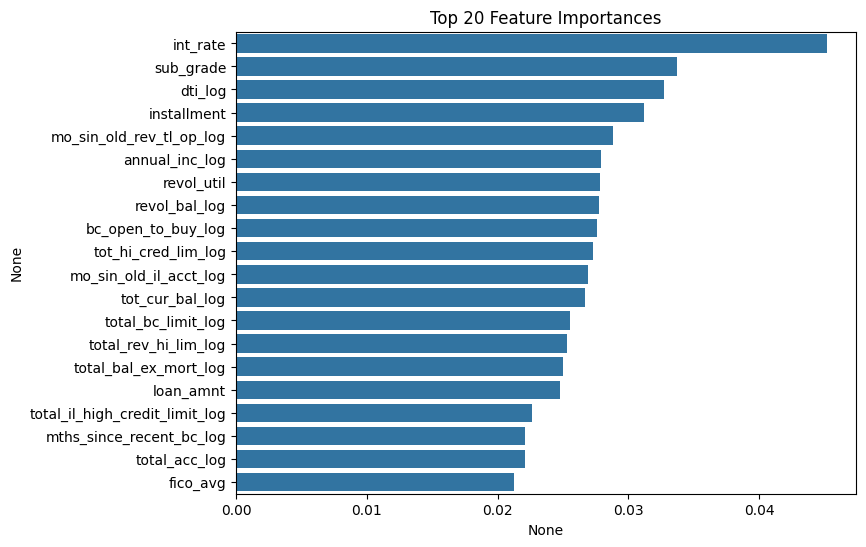

In [12]:
importance = model.feature_importances_
importances = pd.Series(importance, index=df.drop(columns=['loan_status', 'Unnamed: 0']).columns)
top20 = importances.sort_values(ascending=False)[:20]
plt. figure (figsize=(8,6))
plt. title('Top 20 Feature Importances') 
sns.barplot(x=top20, y=top20.index)
plt.show()

In [17]:
joblib.dump(model, './statistical_model/randomforest.pkl')

['./statistical_model/randomforest.pkl']

In [18]:
top20

int_rate                          0.045140
sub_grade                         0.033729
dti_log                           0.032707
installment                       0.031154
mo_sin_old_rev_tl_op_log          0.028815
annual_inc_log                    0.027895
revol_util                        0.027848
revol_bal_log                     0.027726
bc_open_to_buy_log                0.027585
tot_hi_cred_lim_log               0.027268
mo_sin_old_il_acct_log            0.026935
tot_cur_bal_log                   0.026648
total_bc_limit_log                0.025563
total_rev_hi_lim_log              0.025273
total_bal_ex_mort_log             0.024998
loan_amnt                         0.024789
total_il_high_credit_limit_log    0.022618
mths_since_recent_bc_log          0.022096
total_acc_log                     0.022073
fico_avg                          0.021228
dtype: float64